In [1]:
import sys
import os
project_root = os.path.abspath(os.path.join(os.getcwd(),".."))
sys.path.append(project_root)

In [2]:
import pandas as pd

dfs = []
dfs.append(pd.read_csv('../data/260204/1_SiPM_ChannelsTest_Ch5-8_Ch14_CT_Thr1_Background.csv'))
dfs.append(pd.read_csv('../data/260204/2_SiPM_ChannelsTest_Ch5-8_Ch10_CT_Thr1_Background.csv'))
dfs.append(pd.read_csv('../data/260204/3_SiPM_ChannelsTest_Ch5-8_Ch6_CT_Thr1_Background.csv'))
dfs.append(pd.read_csv('../data/260204/4_SiPM_ChannelsTest_Ch5-8_Ch2_CT_Thr1_Background.csv'))

dfs[0]

,Detector,ID,Trigger,Time_sub,Time_sec,Time_gps,Temp,Ch1,Ch2,Ch3,...,Ch9,Ch10,Ch11,Ch12,Ch13,Ch14,Ch15,Ch16,Argmax,Summed
0,5,465,21,16541256,4380,42069,149,152,144,106,...,131,142,126,120,121,215,109,141,14,2126
1,5,466,21,16701119,4380,42069,149,150,143,103,...,131,140,123,118,119,214,108,136,14,2096
2,5,467,20,16701119,4380,42069,149,151,143,105,...,130,140,123,118,120,247,109,135,14,2134
3,5,468,20,16701119,4380,42069,149,150,144,105,...,129,140,123,120,121,275,108,136,14,2166
4,5,469,21,16909593,4380,42069,149,150,143,104,...,128,140,123,118,120,313,108,135,14,2193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99737,5,100351,20,26478890,4568,42069,149,149,142,103,...,130,141,124,117,120,249,107,135,14,2129
99738,5,100352,21,26567722,4568,42069,149,150,143,105,...,130,140,124,117,119,282,106,135,14,2164
99739,5,100353,21,26751297,4568,42069,149,149,143,105,...,130,140,124,118,122,532,107,137,14,2423
99740,5,100354,21,26795836,4568,42069,149,150,143,103,...,129,142,123,117,120,340,108,136,14,2223


In [3]:
import matplotlib.pyplot as plt

N_BINS = 512
BITS_12 = 2**12

summed_spectra = [df[ch].tolist() for df, ch in zip(dfs, ['Ch14', 'Ch10', 'Ch6', 'Ch2'])]

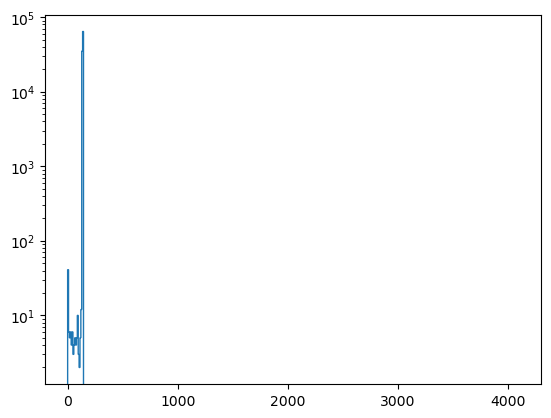

In [9]:
import numpy as np
times = [164.365, 148.329, 161.756, 119.645]
plt.hist(dfs[0]['Ch16'], N_BINS, range=(0,BITS_12), log=True, histtype='step')
plt.show()

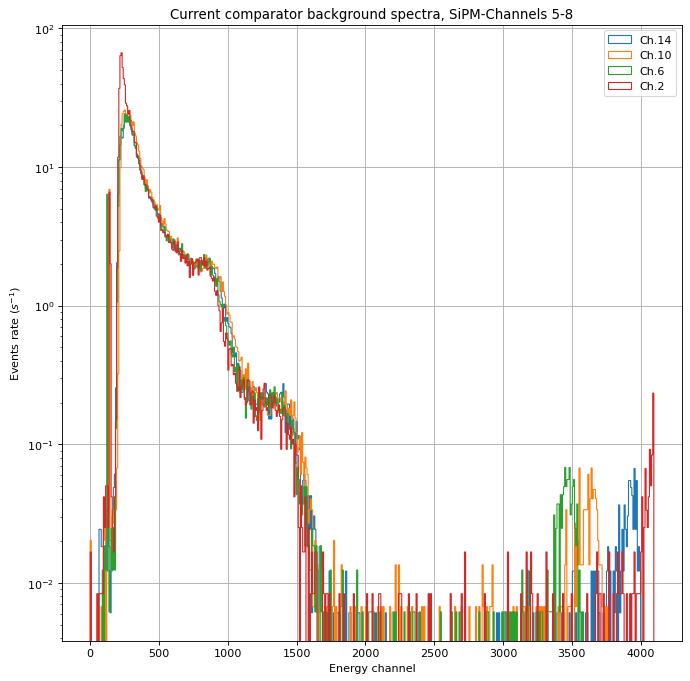

In [34]:
import numpy as np
times = [164.365, 148.329, 161.756, 119.645]
plt.figure(figsize=(10,10), dpi=80)
legend = ['Ch.14', 'Ch.10', 'Ch.6', 'Ch.2']
for idx,s in enumerate(summed_spectra):
    plt.hist(s, N_BINS, range=(0,BITS_12), weights=(1/times[idx])*np.ones_like(s), log=True, histtype='step', label=legend[idx])
plt.legend()
plt.xlabel(r'Energy channel')
plt.ylabel(r'Count rate ($s^{-1}$)')
plt.title('Current comparator background spectra, SiPM-Channels 5-8')
plt.xticks(np.arange(0,4500,500))
plt.grid()
plt.show()

In [21]:
dfs_ch1_4 = []
dfs_ch1_4.append(pd.read_csv('../data/260204/5_SiPM_ChannelsTest_Ch1-4_Ch2_CT_Thr1_Background.csv'))
dfs_ch1_4.append(pd.read_csv('../data/260204/6_SiPM_ChannelsTest_Ch1-4_Ch6_CT_Thr1_Background.csv'))
dfs_ch1_4.append(pd.read_csv('../data/260204/7_SiPM_ChannelsTest_Ch1-4_Ch10_CT_Thr1_Background.csv'))
dfs_ch1_4.append(pd.read_csv('../data/260204/8_SiPM_ChannelsTest_Ch1-4_Ch14_CT_Thr1_Background.csv'))

dfs_ch1_4 = dfs_ch1_4[::-1]
single_ch_spectra = [df[ch].tolist() for df, ch in zip(dfs_ch1_4, ['Ch14', 'Ch10', 'Ch6', 'Ch2'])]

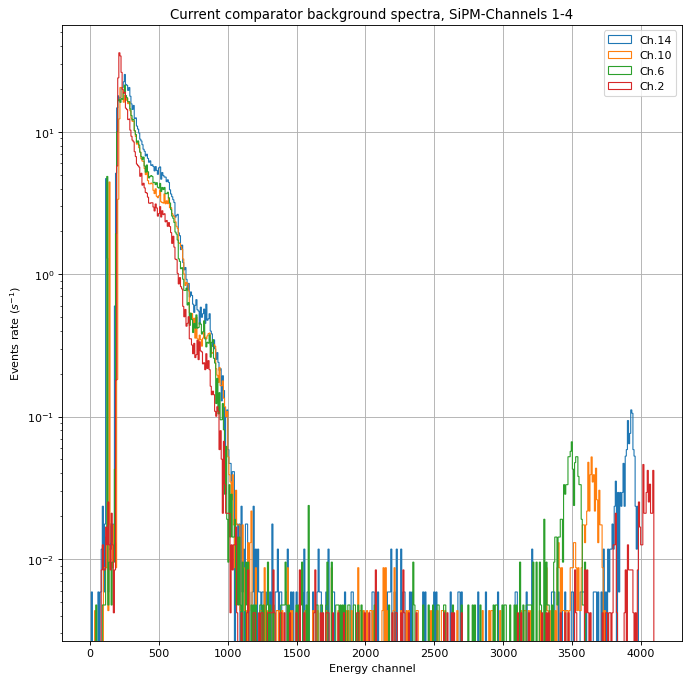

In [35]:
times_ch1_4 = [170.448, 230.292, 210.383, 238.595]
plt.figure(figsize=(10,10), dpi=80)
legend = ['Ch.14', 'Ch.10', 'Ch.6', 'Ch.2']
for idx,s in enumerate(single_ch_spectra):
    plt.hist(s, N_BINS, range=(0,BITS_12), weights=(1/times_ch1_4[idx])*np.ones_like(s), log=True, histtype='step', label=legend[idx])
plt.legend()
plt.xlabel(r'Energy channel')
plt.ylabel(r'Count rate ($s^{-1}$)')
plt.title('Current comparator background spectra, SiPM-Channels 1-4')
plt.xticks(np.arange(0,4500,500))
plt.grid()
plt.show()

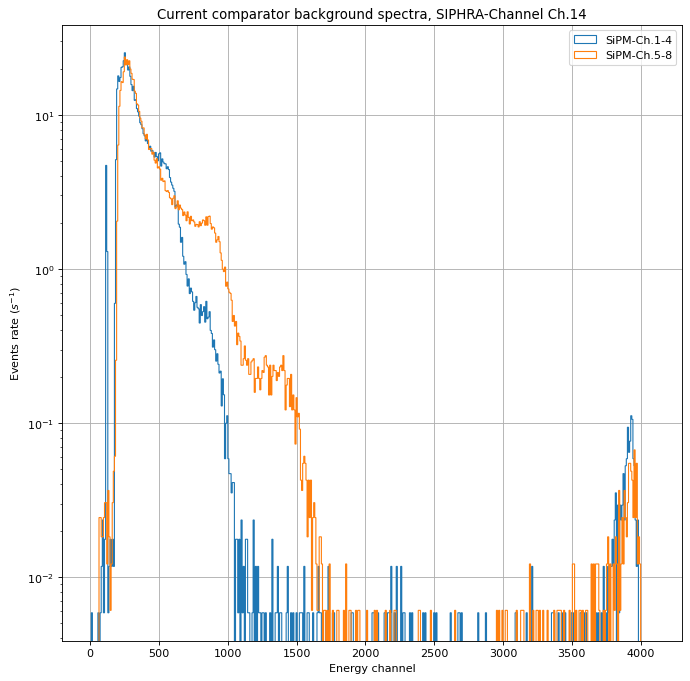

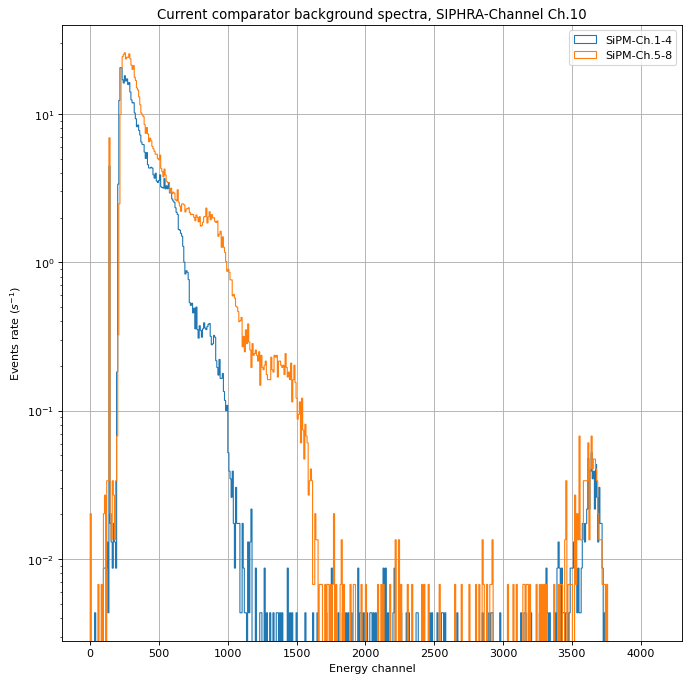

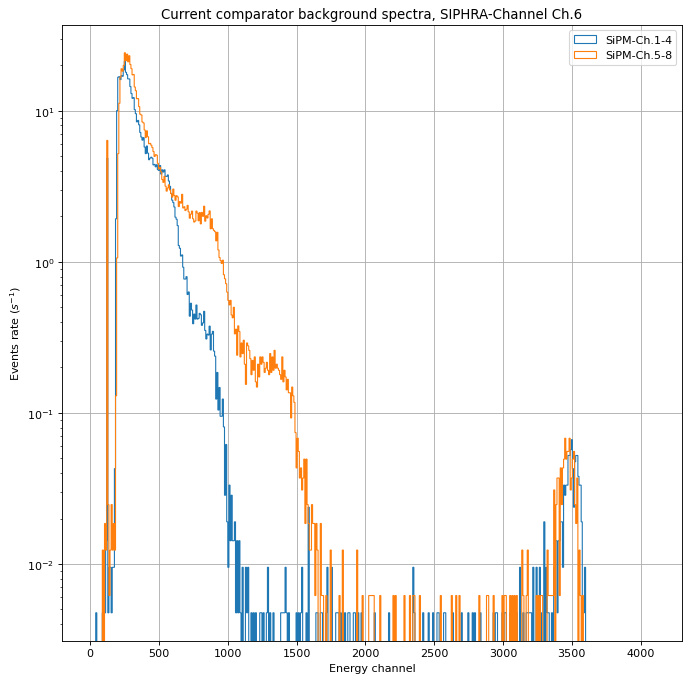

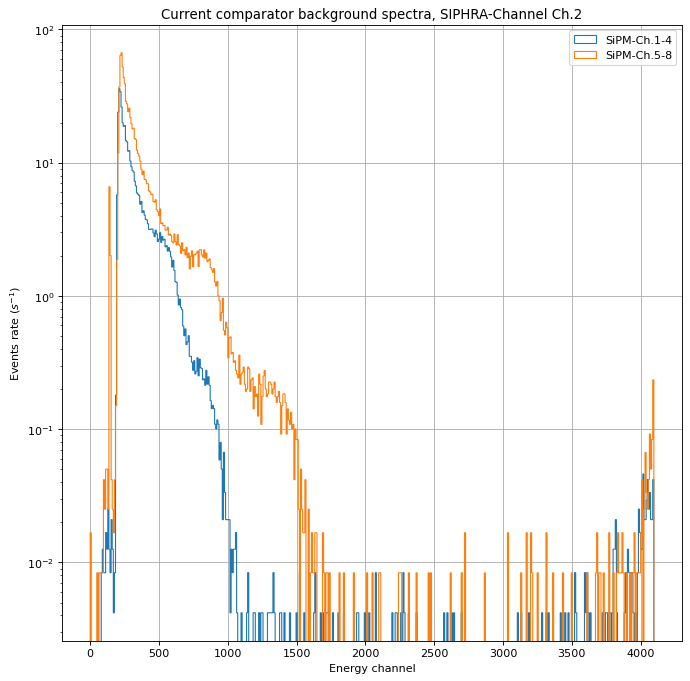

In [36]:
for idx, (spct1, spct2) in enumerate(zip(summed_spectra, single_ch_spectra)):
    plt.figure(figsize=(10,10), dpi=80)
    plt.hist(spct2, N_BINS, range=(0,BITS_12), weights=(1/times_ch1_4[idx])*np.ones_like(spct2), log=True, histtype='step', label='SiPM-Ch.1-4')
    plt.hist(spct1, N_BINS, range=(0,BITS_12), weights=(1/times[idx])*np.ones_like(spct1), log=True, histtype='step', label='SiPM-Ch.5-8')
    plt.legend()
    plt.xlabel(r'Energy channel')
    plt.ylabel(r'Count rate ($s^{-1}$)')
    plt.title('Current comparator background spectra, SIPHRA-Channel '+legend[idx])
    plt.xticks(np.arange(0,4500,500))
    plt.grid()
    plt.show()